---

In [2]:
!python3 -m venv minihack
!source minihack/bin/activate
!pip install nle
!pip install matplotlib notebook

Activate the jupyter server and access it by the localhost at the given port (usually 8888 or around that number)

In [7]:
!jupyter notebook

[I 16:26:29.056 NotebookApp] Writing notebook server cookie secret to /home/riccardo/.local/share/jupyter/runtime/notebook_cookie_secret
[I 16:26:30.451 NotebookApp] JupyterLab extension loaded from /home/riccardo/anaconda3/lib/python3.8/site-packages/jupyterlab
[I 16:26:30.451 NotebookApp] JupyterLab application directory is /home/riccardo/anaconda3/share/jupyter/lab
[I 16:26:30.462 NotebookApp] Serving notebooks from local directory: /home/riccardo/AIF project/handson-search
[I 16:26:30.463 NotebookApp] The Jupyter Notebook is running at:
[I 16:26:30.463 NotebookApp] http://localhost:8888/?token=dd871d94e8dbebf6a365acf564e1399f8d4922eb849244f1
[I 16:26:30.464 NotebookApp]  or http://127.0.0.1:8888/?token=dd871d94e8dbebf6a365acf564e1399f8d4922eb849244f1
[I 16:26:30.464 NotebookApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
[C 16:26:35.970 NotebookApp] 
    
    To access the notebook, open this file in a browser:
        file:///home/ric

---

## Creating minihack environments and their features

In [8]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

Show list of all minihack environments

In [9]:
!python -m minihack.scripts.env_list

MiniHack-Room-5x5-v0
MiniHack-Room-Random-5x5-v0
MiniHack-Room-Dark-5x5-v0
MiniHack-Room-Monster-5x5-v0
MiniHack-Room-Trap-5x5-v0
MiniHack-Room-Ultimate-5x5-v0
MiniHack-Room-15x15-v0
MiniHack-Room-Random-15x15-v0
MiniHack-Room-Dark-15x15-v0
MiniHack-Room-Monster-15x15-v0
MiniHack-Room-Trap-15x15-v0
MiniHack-Room-Ultimate-15x15-v0
MiniHack-Corridor-R2-v0
MiniHack-Corridor-R3-v0
MiniHack-Corridor-R5-v0
MiniHack-KeyRoom-Fixed-S5-v0
MiniHack-KeyRoom-S5-v0
MiniHack-KeyRoom-S15-v0
MiniHack-KeyRoom-Dark-S5-v0
MiniHack-KeyRoom-Dark-S15-v0
MiniHack-MazeWalk-9x9-v0
MiniHack-MazeWalk-Mapped-9x9-v0
MiniHack-MazeWalk-15x15-v0
MiniHack-MazeWalk-Mapped-15x15-v0
MiniHack-MazeWalk-45x19-v0
MiniHack-MazeWalk-Mapped-45x19-v0
MiniHack-CorridorBattle-v0
MiniHack-CorridorBattle-Dark-v0
MiniHack-MultiRoom-N2-v0
MiniHack-MultiRoom-N4-v0
MiniHack-MultiRoom-N6-v0
MiniHack-MultiRoom-N10-v0
MiniHack-MultiRoom-N6-OpenDoor-v0
MiniHack-MultiRoom-N10-OpenDoor-v0
MiniHack-MultiRoom-N2-Locked-v0
MiniHack-MultiRoom-N4-L

Create and render the environment

In [14]:
# create the environment
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0")
# reset it to initial state
state = env.reset()
# render the environment
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---     ----      ---                                                           
|.       ..        .|                                                           
|.... ..... ........|                                                           
|.. . .  .. . .   ..|                                                           
|.. . ..... . . . ..|                                                           
|.. . . ...   . . ..|                                                           
|.. . . .>. . . ....|                                                           
|....   ..... . .  .|                                                           
|.......... ... ....|      

Using the env instance is possible to print the available actions

In [15]:
env.actions

(<CompassDirection.N: 107>,
 <CompassDirection.E: 108>,
 <CompassDirection.S: 106>,
 <CompassDirection.W: 104>,
 <CompassDirection.NE: 117>,
 <CompassDirection.SE: 110>,
 <CompassDirection.SW: 98>,
 <CompassDirection.NW: 121>,
 <Command.OPEN: 111>,
 <Command.KICK: 4>,
 <Command.SEARCH: 115>,
 <Command.EAT: 101>)

Analyzing the state variable we can see all the different representations

check: https://minihack.readthedocs.io/en/latest/getting-started/observation_spaces.html

In [16]:
state

{'glyphs': array([[2359, 2359, 2359, ..., 2359, 2359, 2359],
        [2359, 2359, 2359, ..., 2359, 2359, 2359],
        [2359, 2359, 2359, ..., 2359, 2359, 2359],
        ...,
        [2359, 2359, 2359, ..., 2359, 2359, 2359],
        [2359, 2359, 2359, ..., 2359, 2359, 2359],
        [2359, 2359, 2359, ..., 2359, 2359, 2359]], dtype=int16),
 'chars': array([[32, 32, 32, ..., 32, 32, 32],
        [32, 32, 32, ..., 32, 32, 32],
        [32, 32, 32, ..., 32, 32, 32],
        ...,
        [32, 32, 32, ..., 32, 32, 32],
        [32, 32, 32, ..., 32, 32, 32],
        [32, 32, 32, ..., 32, 32, 32]], dtype=uint8),
 'colors': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'specials': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0,

In our case we will consider only two representations:
- _chars_: represents the map using a multi-dimensional array containing the ASCII encoding of the characters
- _pixel_: stores the 3 channel informations to render visually the environment

In [17]:
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---     ----      ---                                                           
|.       ..        .|                                                           
|.......... . ......|                                                           
|..     .....   .  .|                                                           
|.. ....... ... ....|                                                           
|..     ...   .   ..|                                                           
|...... .>. . ... ..|                                                           
|@.   . ... .   . ..|                                                           
|...... ... ........|      

Print the shape of the two representations

In [18]:
state['chars'].shape, state['pixel'].shape

((21, 79), (336, 1264, 3))

We can render visually the environment

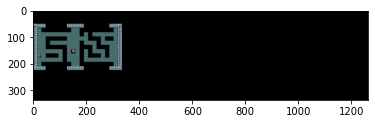

In [19]:
plt.imshow(state['pixel'])

---

In [20]:
from utils import *
from algorithms import bfs, a_star

ModuleNotFoundError: No module named 'algorithms'

## Breadth-First Search (BFS)

```
procedure BFS(G, start_vertex):
    create a queue Q
    create a set visited
    enqueue start_vertex into Q
    add start_vertex to visited
    
    while Q is not empty:
        current_vertex = dequeue from Q
        process current_vertex
        
        for each neighbor in G.adjacent(current_vertex):
            if neighbor is not in visited:
                enqueue neighbor into Q
                add neighbor to visited

Create the first environment

In [21]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---         ----          ---                                                   
|@           ..            .|                                                   
|.......... ... ............|                                                   
|..       . ..> .     .   ..|                                                   
|.. ....... ... . ... . ....|                                                   
|..     .   ... . . . . .  .|                                                   
|.. ... ....... ... . . ....|                                                   
|.... .     ...     . .    .|                                                   
|.... ..... ... ... . .....

Render the environment (we reduce the representation to remove usesless black space)

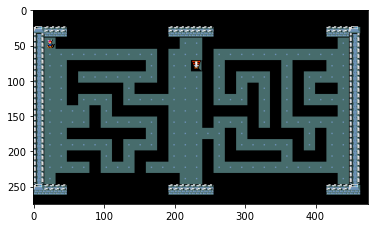

In [22]:
plt.imshow(state['pixel'][25:300, :475])

Store the state ASCII representation, which will be used to compute the solution, and the pixel information

In [23]:
game_map = state['chars']
game = state['pixel']

Find the player (@) and the target (>) using the functions in _utils.py_

In [24]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (4, 1)
Target position: (6, 14)


Compute the solution finding the path to reach the target

In [25]:
%%time
path = bfs(game_map, start, target)

NameError: name 'bfs' is not defined

The expected output is a list of tuples that contains the (x, y) coordinates that the player has to visit in order to reach the target.

In [26]:
path

NameError: name 'path' is not defined

From the sequence of (x, y) coordinates compute the actual actions.

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
actions

Iterate over actions and render the environment to see the solution.

In [ ]:
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

---

## Using custom des files
- https://minihack-editor.github.io/
- https://minihack.readthedocs.io/en/latest/tutorials/des_file_tutorial.html

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "simple_maze.des",
)
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][75:300, 450:800])

In [ ]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [ ]:
%%time
path = bfs(game_map, start, target)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game[75:300, 450:800])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][75:300, 450:800])

---

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "complex_maze.des",
)
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][:, 300:975])

In [ ]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [ ]:
%%time
path = bfs(game_map, start, target)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975])

---

## A* Search Algorithm

A* (star) Pathfinding
```
// Initialize both open and closed list  
let the openList equal empty list of nodes  
let the closedList equal empty list of nodes
// Add the start node  
put the startNode on the openList
// Loop until you find the end  
while the openList is not empty
	// Get the current node  
    let the currentNode equal the node with the least f value  
    remove the currentNode from the openList  
    add the currentNode to the closedList
    // Check if found the goal  
    if currentNode is the goal  
        Congratz! You've found the end! Backtrack to get path
	
	// Generate children  
    let the children of the currentNode equal the adjacent nodes  
      
    for each child in the children 
	    // Check if child is on the closedList  
        if child is in the closedList  
            continue to beginning of for loop
        
        // Create the f, g, and h values  
        child.g = currentNode.g + distance between child and current  
        child.h = distance from child to end  
        child.f = child.g + child.h
        
        // Child is already in openList  
        if child.position is in the openList's nodes positions  
            if the child.g is higher than the openList node's g  
                continue to beginning of for loop
        
        // Add the child to the openList  
        add the child to the openList

In [ ]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][25:300, :475])

In [ ]:
game_map = state['chars']
game = state['pixel']

In [ ]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

In [ ]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

---

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "simple_maze.des",
)
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][75:300, 450:800])

In [ ]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [ ]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game[75:300, 450:800])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][75:300, 450:800])

---

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "complex_maze.des",
)
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][:, 300:975])

In [ ]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [ ]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975])

---

Using the '_crop_' combined with some observation keys, it returns a view centered around the agent.
Usually is 9x9, but can be modified at preference.

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel_crop"),
    des_file = "complex_maze.des",
)
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel_crop'])

In [ ]:
game_map = state['chars']
game = state['pixel_crop']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [ ]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game)
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel_crop'])